In [1]:
from __future__ import division, print_function
from tensorflow.python.keras.layers.core import Dense
from tensorflow.python.keras.layers import Dense,BatchNormalization
from tensorflow.python.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import math
import os
import matplotlib.pyplot as plt


In [2]:
data = np.load('../fac_cond256_unit8.npz')
raw_X=data['cond']
raw_X=np.squeeze(raw_X)
raw_Y=data['fac'][0:,1]
raw_Y=raw_Y.astype(np.float64)
raw_Y=np.expand_dims(raw_Y,-1)
NUM_TIMESTEPS = 65
BATCH_SIZE = 256   
NUM_EPOCHS = 3000
Xtrain=raw_X[:-1000]
Ytrain=raw_Y[:-1000]
Xtest=raw_X[-1000:]
Ytest=raw_Y[-1000:]


In [3]:
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

(2000, 65) (1000, 65) (2000, 1) (1000, 1)


In [4]:
model = Sequential()
model.add(Dense(64,activation= 'sigmoid',input_shape=(65,)))
model.add(BatchNormalization())
model.add(Dense(128,activation= 'sigmoid'))
model.add(BatchNormalization())
model.add(Dense(256,activation= 'sigmoid'))
model.add(BatchNormalization())
model.add(Dense(100,activation= 'sigmoid'))
model.add(BatchNormalization())
model.add(Dense(1))
model.summary()

model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                4224      
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dense_3 (Dense)              (None, 100)               2

In [5]:
history=model.fit(Xtrain, Ytrain, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=(Xtest, Ytest),shuffle=True)
score, _ = model.evaluate(Xtest, Ytest, batch_size=BATCH_SIZE)
rmse = math.sqrt(score)
print("\nMSE: {:.3f}, RMSE: {:.3f}".format(score, rmse))
 

Epoch 1/3000
8/8 [==============================] - 1s 18ms/step - loss: 1.3934 - mean_squared_error: 1.3934 - val_loss: 1.1301 - val_mean_squared_error: 1.1301
Epoch 2/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.5288 - mean_squared_error: 0.5288 - val_loss: 0.8433 - val_mean_squared_error: 0.8433
Epoch 3/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.3305 - mean_squared_error: 0.3305 - val_loss: 0.6403 - val_mean_squared_error: 0.6403
Epoch 4/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.2194 - mean_squared_error: 0.2194 - val_loss: 0.4698 - val_mean_squared_error: 0.4698
Epoch 5/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.1419 - mean_squared_error: 0.1419 - val_loss: 0.3471 - val_mean_squared_error: 0.3471
Epoch 6/3000
8/8 [==============================] - 0s 5ms/step - loss: 0.0853 - mean_squared_error: 0.0853 - val_loss: 0.2483 - val_mean_squared_error: 0.2483
Epoch 7/3000
8/8 [=====================

8/8 [==============================] - 0s 5ms/step - loss: 2.0000e-04 - mean_squared_error: 2.0000e-04 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 51/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.3635e-04 - mean_squared_error: 2.3635e-04 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 52/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.1682e-04 - mean_squared_error: 1.1682e-04 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 53/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.9799e-04 - mean_squared_error: 1.9799e-04 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 54/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.5009e-04 - mean_squared_error: 1.5009e-04 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 55/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.4346e-04 - mean_squared_error: 1.4346e-04 - val_loss: 0.0015 - val_mean_squared_error: 0.0015


8/8 [==============================] - 0s 4ms/step - loss: 2.5055e-04 - mean_squared_error: 2.5055e-04 - val_loss: 5.8515e-04 - val_mean_squared_error: 5.8515e-04
Epoch 98/3000
8/8 [==============================] - 0s 5ms/step - loss: 6.0243e-04 - mean_squared_error: 6.0243e-04 - val_loss: 9.2207e-04 - val_mean_squared_error: 9.2207e-04
Epoch 99/3000
8/8 [==============================] - 0s 4ms/step - loss: 4.4257e-04 - mean_squared_error: 4.4257e-04 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 100/3000
8/8 [==============================] - 0s 5ms/step - loss: 2.7647e-04 - mean_squared_error: 2.7647e-04 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 101/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.1197e-04 - mean_squared_error: 2.1197e-04 - val_loss: 5.9449e-04 - val_mean_squared_error: 5.9449e-04
Epoch 102/3000
8/8 [==============================] - 0s 5ms/step - loss: 2.2582e-04 - mean_squared_error: 2.2582e-04 - val_loss: 2.5850e-04 - 

8/8 [==============================] - 0s 4ms/step - loss: 1.6005e-04 - mean_squared_error: 1.6005e-04 - val_loss: 4.3929e-04 - val_mean_squared_error: 4.3929e-04
Epoch 144/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.5406e-04 - mean_squared_error: 1.5406e-04 - val_loss: 5.1194e-04 - val_mean_squared_error: 5.1194e-04
Epoch 145/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.5289e-04 - mean_squared_error: 1.5289e-04 - val_loss: 9.0069e-04 - val_mean_squared_error: 9.0069e-04
Epoch 146/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.1551e-04 - mean_squared_error: 1.1551e-04 - val_loss: 8.3726e-04 - val_mean_squared_error: 8.3726e-04
Epoch 147/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.2163e-04 - mean_squared_error: 1.2163e-04 - val_loss: 5.4552e-04 - val_mean_squared_error: 5.4552e-04
Epoch 148/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.2922e-05 - mean_squared_error: 8.2922e-05 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 2.0046e-04 - mean_squared_error: 2.0046e-04 - val_loss: 3.1861e-04 - val_mean_squared_error: 3.1861e-04
Epoch 190/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.2411e-04 - mean_squared_error: 2.2411e-04 - val_loss: 1.0397e-04 - val_mean_squared_error: 1.0397e-04
Epoch 191/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.6976e-04 - mean_squared_error: 2.6976e-04 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 192/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.4318e-04 - mean_squared_error: 3.4318e-04 - val_loss: 0.0030 - val_mean_squared_error: 0.0030
Epoch 193/3000
8/8 [==============================] - 0s 4ms/step - loss: 6.8950e-04 - mean_squared_error: 6.8950e-04 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 194/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0036 - val_mean_squared_e

Epoch 236/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.3379e-04 - mean_squared_error: 3.3379e-04 - val_loss: 9.1661e-04 - val_mean_squared_error: 9.1661e-04
Epoch 237/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.4685e-04 - mean_squared_error: 2.4685e-04 - val_loss: 6.5919e-04 - val_mean_squared_error: 6.5919e-04
Epoch 238/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.4873e-04 - mean_squared_error: 1.4873e-04 - val_loss: 5.8793e-04 - val_mean_squared_error: 5.8793e-04
Epoch 239/3000
8/8 [==============================] - 0s 4ms/step - loss: 6.3494e-05 - mean_squared_error: 6.3494e-05 - val_loss: 2.6362e-04 - val_mean_squared_error: 2.6362e-04
Epoch 240/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.6097e-05 - mean_squared_error: 7.6097e-05 - val_loss: 2.6146e-04 - val_mean_squared_error: 2.6146e-04
Epoch 241/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.9522e-05 - mean_squared_error: 8.9

8/8 [==============================] - 0s 4ms/step - loss: 2.4335e-05 - mean_squared_error: 2.4335e-05 - val_loss: 2.1202e-04 - val_mean_squared_error: 2.1202e-04
Epoch 283/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.7576e-05 - mean_squared_error: 3.7576e-05 - val_loss: 2.9150e-04 - val_mean_squared_error: 2.9150e-04
Epoch 284/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.6013e-05 - mean_squared_error: 7.6013e-05 - val_loss: 1.4461e-04 - val_mean_squared_error: 1.4461e-04
Epoch 285/3000
8/8 [==============================] - 0s 4ms/step - loss: 4.0283e-05 - mean_squared_error: 4.0283e-05 - val_loss: 2.9595e-04 - val_mean_squared_error: 2.9595e-04
Epoch 286/3000
8/8 [==============================] - 0s 4ms/step - loss: 6.3653e-05 - mean_squared_error: 6.3653e-05 - val_loss: 1.6619e-04 - val_mean_squared_error: 1.6619e-04
Epoch 287/3000
8/8 [==============================] - 0s 4ms/step - loss: 5.3610e-05 - mean_squared_error: 5.3610e-05 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 4.7342e-05 - mean_squared_error: 4.7342e-05 - val_loss: 1.1610e-04 - val_mean_squared_error: 1.1610e-04
Epoch 329/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.0839e-05 - mean_squared_error: 7.0839e-05 - val_loss: 1.7608e-04 - val_mean_squared_error: 1.7608e-04
Epoch 330/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.2417e-05 - mean_squared_error: 8.2417e-05 - val_loss: 5.1363e-05 - val_mean_squared_error: 5.1363e-05
Epoch 331/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.4999e-04 - mean_squared_error: 1.4999e-04 - val_loss: 6.3559e-05 - val_mean_squared_error: 6.3559e-05
Epoch 332/3000
8/8 [==============================] - 0s 4ms/step - loss: 9.9098e-05 - mean_squared_error: 9.9098e-05 - val_loss: 1.7843e-04 - val_mean_squared_error: 1.7843e-04
Epoch 333/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.6120e-04 - mean_squared_error: 2.6120e-04 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 7.1176e-05 - mean_squared_error: 7.1176e-05 - val_loss: 3.6365e-04 - val_mean_squared_error: 3.6365e-04
Epoch 375/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.4404e-04 - mean_squared_error: 1.4404e-04 - val_loss: 1.8799e-04 - val_mean_squared_error: 1.8799e-04
Epoch 376/3000
8/8 [==============================] - 0s 4ms/step - loss: 5.1309e-05 - mean_squared_error: 5.1309e-05 - val_loss: 9.0093e-05 - val_mean_squared_error: 9.0093e-05
Epoch 377/3000
8/8 [==============================] - 0s 4ms/step - loss: 6.2665e-05 - mean_squared_error: 6.2665e-05 - val_loss: 8.3889e-05 - val_mean_squared_error: 8.3889e-05
Epoch 378/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.8444e-05 - mean_squared_error: 3.8444e-05 - val_loss: 9.4221e-05 - val_mean_squared_error: 9.4221e-05
Epoch 379/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.7011e-05 - mean_squared_error: 7.7011e-05 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 2.9141e-05 - mean_squared_error: 2.9141e-05 - val_loss: 4.5229e-04 - val_mean_squared_error: 4.5229e-04
Epoch 421/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.7890e-05 - mean_squared_error: 3.7890e-05 - val_loss: 3.1425e-04 - val_mean_squared_error: 3.1425e-04
Epoch 422/3000
8/8 [==============================] - 0s 4ms/step - loss: 9.2861e-05 - mean_squared_error: 9.2861e-05 - val_loss: 4.6138e-04 - val_mean_squared_error: 4.6138e-04
Epoch 423/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.2828e-04 - mean_squared_error: 1.2828e-04 - val_loss: 2.9900e-04 - val_mean_squared_error: 2.9900e-04
Epoch 424/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.0796e-04 - mean_squared_error: 1.0796e-04 - val_loss: 3.1569e-04 - val_mean_squared_error: 3.1569e-04
Epoch 425/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.5870e-04 - mean_squared_error: 1.5870e-04 - val_l

8/8 [==============================] - 0s 5ms/step - loss: 1.4705e-04 - mean_squared_error: 1.4705e-04 - val_loss: 9.2099e-04 - val_mean_squared_error: 9.2099e-04
Epoch 467/3000
8/8 [==============================] - 0s 4ms/step - loss: 6.7576e-05 - mean_squared_error: 6.7576e-05 - val_loss: 7.9289e-04 - val_mean_squared_error: 7.9289e-04
Epoch 468/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.1389e-05 - mean_squared_error: 8.1389e-05 - val_loss: 2.2835e-04 - val_mean_squared_error: 2.2835e-04
Epoch 469/3000
8/8 [==============================] - 0s 4ms/step - loss: 9.1937e-05 - mean_squared_error: 9.1937e-05 - val_loss: 1.7601e-04 - val_mean_squared_error: 1.7601e-04
Epoch 470/3000
8/8 [==============================] - 0s 7ms/step - loss: 5.6732e-05 - mean_squared_error: 5.6732e-05 - val_loss: 6.4042e-04 - val_mean_squared_error: 6.4042e-04
Epoch 471/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.4140e-04 - mean_squared_error: 1.4140e-04 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 6.4879e-05 - mean_squared_error: 6.4879e-05 - val_loss: 8.4952e-04 - val_mean_squared_error: 8.4952e-04
Epoch 513/3000
8/8 [==============================] - 0s 5ms/step - loss: 4.1263e-04 - mean_squared_error: 4.1263e-04 - val_loss: 9.4483e-05 - val_mean_squared_error: 9.4483e-05
Epoch 514/3000
8/8 [==============================] - 0s 5ms/step - loss: 2.9883e-04 - mean_squared_error: 2.9883e-04 - val_loss: 2.1834e-04 - val_mean_squared_error: 2.1834e-04
Epoch 515/3000
8/8 [==============================] - 0s 8ms/step - loss: 8.4786e-04 - mean_squared_error: 8.4786e-04 - val_loss: 3.9116e-04 - val_mean_squared_error: 3.9116e-04
Epoch 516/3000
8/8 [==============================] - 0s 5ms/step - loss: 6.5994e-04 - mean_squared_error: 6.5994e-04 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 517/3000
8/8 [==============================] - 0s 5ms/step - loss: 3.9038e-04 - mean_squared_error: 3.9038e-04 - val_loss: 5.9

8/8 [==============================] - 0s 4ms/step - loss: 1.0539e-04 - mean_squared_error: 1.0539e-04 - val_loss: 7.3356e-04 - val_mean_squared_error: 7.3356e-04
Epoch 559/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.1287e-04 - mean_squared_error: 1.1287e-04 - val_loss: 3.2690e-04 - val_mean_squared_error: 3.2690e-04
Epoch 560/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.7358e-05 - mean_squared_error: 8.7358e-05 - val_loss: 1.3780e-04 - val_mean_squared_error: 1.3780e-04
Epoch 561/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.2077e-04 - mean_squared_error: 2.2077e-04 - val_loss: 3.1247e-04 - val_mean_squared_error: 3.1247e-04
Epoch 562/3000
8/8 [==============================] - 0s 4ms/step - loss: 4.1131e-04 - mean_squared_error: 4.1131e-04 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 563/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.0370e-04 - mean_squared_error: 3.0370e-04 - val_loss: 0.0

8/8 [==============================] - 0s 4ms/step - loss: 2.9780e-05 - mean_squared_error: 2.9780e-05 - val_loss: 1.0870e-04 - val_mean_squared_error: 1.0870e-04
Epoch 605/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.9617e-05 - mean_squared_error: 2.9617e-05 - val_loss: 1.2556e-04 - val_mean_squared_error: 1.2556e-04
Epoch 606/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.9376e-05 - mean_squared_error: 2.9376e-05 - val_loss: 1.0084e-04 - val_mean_squared_error: 1.0084e-04
Epoch 607/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.9747e-05 - mean_squared_error: 1.9747e-05 - val_loss: 1.9879e-04 - val_mean_squared_error: 1.9879e-04
Epoch 608/3000
8/8 [==============================] - 0s 4ms/step - loss: 5.1019e-05 - mean_squared_error: 5.1019e-05 - val_loss: 2.9314e-04 - val_mean_squared_error: 2.9314e-04
Epoch 609/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.9102e-05 - mean_squared_error: 3.9102e-05 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 1.7776e-04 - mean_squared_error: 1.7776e-04 - val_loss: 2.9826e-04 - val_mean_squared_error: 2.9826e-04
Epoch 651/3000
8/8 [==============================] - 0s 4ms/step - loss: 9.0152e-05 - mean_squared_error: 9.0152e-05 - val_loss: 2.6434e-04 - val_mean_squared_error: 2.6434e-04
Epoch 652/3000
8/8 [==============================] - 0s 4ms/step - loss: 4.9854e-04 - mean_squared_error: 4.9854e-04 - val_loss: 0.0018 - val_mean_squared_error: 0.0018
Epoch 653/3000
8/8 [==============================] - 0s 4ms/step - loss: 5.2804e-04 - mean_squared_error: 5.2804e-04 - val_loss: 7.0302e-04 - val_mean_squared_error: 7.0302e-04
Epoch 654/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.9057e-04 - mean_squared_error: 3.9057e-04 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 655/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.4403e-04 - mean_squared_error: 3.4403e-04 - val_loss: 0.0034 - va

8/8 [==============================] - 0s 4ms/step - loss: 2.4932e-04 - mean_squared_error: 2.4932e-04 - val_loss: 4.4507e-04 - val_mean_squared_error: 4.4507e-04
Epoch 697/3000
8/8 [==============================] - 0s 5ms/step - loss: 1.7775e-04 - mean_squared_error: 1.7775e-04 - val_loss: 9.0331e-04 - val_mean_squared_error: 9.0331e-04
Epoch 698/3000
8/8 [==============================] - 0s 5ms/step - loss: 1.7366e-04 - mean_squared_error: 1.7366e-04 - val_loss: 3.5342e-04 - val_mean_squared_error: 3.5342e-04
Epoch 699/3000
8/8 [==============================] - 0s 5ms/step - loss: 1.9203e-04 - mean_squared_error: 1.9203e-04 - val_loss: 3.3058e-04 - val_mean_squared_error: 3.3058e-04
Epoch 700/3000
8/8 [==============================] - 0s 5ms/step - loss: 1.7810e-04 - mean_squared_error: 1.7810e-04 - val_loss: 4.2019e-04 - val_mean_squared_error: 4.2019e-04
Epoch 701/3000
8/8 [==============================] - 0s 7ms/step - loss: 1.3491e-04 - mean_squared_error: 1.3491e-04 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 8.0613e-05 - mean_squared_error: 8.0613e-05 - val_loss: 2.5859e-04 - val_mean_squared_error: 2.5859e-04
Epoch 743/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.6865e-04 - mean_squared_error: 1.6865e-04 - val_loss: 3.3320e-04 - val_mean_squared_error: 3.3320e-04
Epoch 744/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.6360e-05 - mean_squared_error: 8.6360e-05 - val_loss: 2.5560e-04 - val_mean_squared_error: 2.5560e-04
Epoch 745/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.0882e-04 - mean_squared_error: 1.0882e-04 - val_loss: 4.9292e-04 - val_mean_squared_error: 4.9292e-04
Epoch 746/3000
8/8 [==============================] - 0s 4ms/step - loss: 9.8384e-05 - mean_squared_error: 9.8384e-05 - val_loss: 1.2366e-04 - val_mean_squared_error: 1.2366e-04
Epoch 747/3000
8/8 [==============================] - 0s 4ms/step - loss: 4.5806e-05 - mean_squared_error: 4.5806e-05 - val_l

8/8 [==============================] - 0s 5ms/step - loss: 1.1881e-04 - mean_squared_error: 1.1881e-04 - val_loss: 3.3956e-04 - val_mean_squared_error: 3.3956e-04
Epoch 789/3000
8/8 [==============================] - 0s 5ms/step - loss: 4.8310e-05 - mean_squared_error: 4.8310e-05 - val_loss: 2.8147e-04 - val_mean_squared_error: 2.8147e-04
Epoch 790/3000
8/8 [==============================] - 0s 5ms/step - loss: 4.2076e-05 - mean_squared_error: 4.2076e-05 - val_loss: 2.2959e-04 - val_mean_squared_error: 2.2959e-04
Epoch 791/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.0723e-04 - mean_squared_error: 1.0723e-04 - val_loss: 2.6911e-04 - val_mean_squared_error: 2.6911e-04
Epoch 792/3000
8/8 [==============================] - 0s 5ms/step - loss: 1.3041e-04 - mean_squared_error: 1.3041e-04 - val_loss: 3.1738e-04 - val_mean_squared_error: 3.1738e-04
Epoch 793/3000
8/8 [==============================] - 0s 5ms/step - loss: 1.0428e-04 - mean_squared_error: 1.0428e-04 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 5.0355e-05 - mean_squared_error: 5.0355e-05 - val_loss: 6.5298e-05 - val_mean_squared_error: 6.5298e-05
Epoch 835/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.8303e-05 - mean_squared_error: 2.8303e-05 - val_loss: 1.9934e-05 - val_mean_squared_error: 1.9934e-05
Epoch 836/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.9309e-05 - mean_squared_error: 2.9309e-05 - val_loss: 2.1942e-05 - val_mean_squared_error: 2.1942e-05
Epoch 837/3000
8/8 [==============================] - 0s 4ms/step - loss: 5.7641e-05 - mean_squared_error: 5.7641e-05 - val_loss: 9.1923e-05 - val_mean_squared_error: 9.1923e-05
Epoch 838/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.1188e-05 - mean_squared_error: 2.1188e-05 - val_loss: 6.9984e-05 - val_mean_squared_error: 6.9984e-05
Epoch 839/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.3753e-05 - mean_squared_error: 2.3753e-05 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 1.4077e-04 - mean_squared_error: 1.4077e-04 - val_loss: 1.6595e-04 - val_mean_squared_error: 1.6595e-04
Epoch 881/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.7467e-04 - mean_squared_error: 1.7467e-04 - val_loss: 3.8632e-04 - val_mean_squared_error: 3.8632e-04
Epoch 882/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.6341e-04 - mean_squared_error: 1.6341e-04 - val_loss: 1.2988e-04 - val_mean_squared_error: 1.2988e-04
Epoch 883/3000
8/8 [==============================] - 0s 5ms/step - loss: 1.0396e-04 - mean_squared_error: 1.0396e-04 - val_loss: 2.0886e-04 - val_mean_squared_error: 2.0886e-04
Epoch 884/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.0919e-04 - mean_squared_error: 2.0919e-04 - val_loss: 1.3039e-04 - val_mean_squared_error: 1.3039e-04
Epoch 885/3000
8/8 [==============================] - 0s 5ms/step - loss: 1.5679e-04 - mean_squared_error: 1.5679e-04 - val_l

Epoch 927/3000
8/8 [==============================] - 0s 4ms/step - loss: 5.9486e-05 - mean_squared_error: 5.9486e-05 - val_loss: 1.1323e-04 - val_mean_squared_error: 1.1323e-04
Epoch 928/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.1380e-04 - mean_squared_error: 1.1380e-04 - val_loss: 8.1498e-05 - val_mean_squared_error: 8.1498e-05
Epoch 929/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.2563e-04 - mean_squared_error: 1.2563e-04 - val_loss: 2.2449e-04 - val_mean_squared_error: 2.2449e-04
Epoch 930/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.0509e-04 - mean_squared_error: 1.0509e-04 - val_loss: 2.2190e-05 - val_mean_squared_error: 2.2190e-05
Epoch 931/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.1938e-05 - mean_squared_error: 7.1938e-05 - val_loss: 1.3892e-04 - val_mean_squared_error: 1.3892e-04
Epoch 932/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.2398e-05 - mean_squared_error: 7.2

8/8 [==============================] - 0s 4ms/step - loss: 2.7031e-05 - mean_squared_error: 2.7031e-05 - val_loss: 7.0743e-05 - val_mean_squared_error: 7.0743e-05
Epoch 974/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.2173e-05 - mean_squared_error: 3.2173e-05 - val_loss: 1.5856e-05 - val_mean_squared_error: 1.5856e-05
Epoch 975/3000
8/8 [==============================] - 0s 4ms/step - loss: 4.6179e-05 - mean_squared_error: 4.6179e-05 - val_loss: 8.3578e-05 - val_mean_squared_error: 8.3578e-05
Epoch 976/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.5275e-05 - mean_squared_error: 3.5275e-05 - val_loss: 2.3265e-04 - val_mean_squared_error: 2.3265e-04
Epoch 977/3000
8/8 [==============================] - 0s 4ms/step - loss: 6.5988e-05 - mean_squared_error: 6.5988e-05 - val_loss: 3.5091e-05 - val_mean_squared_error: 3.5091e-05
Epoch 978/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.3391e-05 - mean_squared_error: 3.3391e-05 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 4.2465e-05 - mean_squared_error: 4.2465e-05 - val_loss: 2.3383e-04 - val_mean_squared_error: 2.3383e-04
Epoch 1020/3000
8/8 [==============================] - 0s 4ms/step - loss: 9.6038e-05 - mean_squared_error: 9.6038e-05 - val_loss: 1.4349e-04 - val_mean_squared_error: 1.4349e-04
Epoch 1021/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.7220e-05 - mean_squared_error: 3.7220e-05 - val_loss: 2.4536e-04 - val_mean_squared_error: 2.4536e-04
Epoch 1022/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.0172e-04 - mean_squared_error: 1.0172e-04 - val_loss: 2.2643e-04 - val_mean_squared_error: 2.2643e-04
Epoch 1023/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.0279e-05 - mean_squared_error: 8.0279e-05 - val_loss: 1.4311e-04 - val_mean_squared_error: 1.4311e-04
Epoch 1024/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.5011e-05 - mean_squared_error: 2.5011e-05 - 

Epoch 1065/3000
8/8 [==============================] - 0s 5ms/step - loss: 5.5460e-05 - mean_squared_error: 5.5460e-05 - val_loss: 2.6354e-04 - val_mean_squared_error: 2.6354e-04
Epoch 1066/3000
8/8 [==============================] - 0s 5ms/step - loss: 2.0687e-05 - mean_squared_error: 2.0687e-05 - val_loss: 3.0631e-04 - val_mean_squared_error: 3.0631e-04
Epoch 1067/3000
8/8 [==============================] - 0s 5ms/step - loss: 1.1926e-04 - mean_squared_error: 1.1926e-04 - val_loss: 3.7419e-04 - val_mean_squared_error: 3.7419e-04
Epoch 1068/3000
8/8 [==============================] - 0s 5ms/step - loss: 1.0912e-04 - mean_squared_error: 1.0912e-04 - val_loss: 1.5174e-04 - val_mean_squared_error: 1.5174e-04
Epoch 1069/3000
8/8 [==============================] - 0s 4ms/step - loss: 6.7069e-05 - mean_squared_error: 6.7069e-05 - val_loss: 2.8359e-04 - val_mean_squared_error: 2.8359e-04
Epoch 1070/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.6378e-04 - mean_squared_erro

8/8 [==============================] - 0s 4ms/step - loss: 1.3922e-05 - mean_squared_error: 1.3922e-05 - val_loss: 4.7853e-05 - val_mean_squared_error: 4.7853e-05
Epoch 1112/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.3992e-05 - mean_squared_error: 1.3992e-05 - val_loss: 4.3255e-05 - val_mean_squared_error: 4.3255e-05
Epoch 1113/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.4291e-05 - mean_squared_error: 1.4291e-05 - val_loss: 2.2449e-05 - val_mean_squared_error: 2.2449e-05
Epoch 1114/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.2088e-05 - mean_squared_error: 1.2088e-05 - val_loss: 1.5386e-05 - val_mean_squared_error: 1.5386e-05
Epoch 1115/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.9552e-05 - mean_squared_error: 2.9552e-05 - val_loss: 1.5215e-05 - val_mean_squared_error: 1.5215e-05
Epoch 1116/3000
8/8 [==============================] - 0s 5ms/step - loss: 8.7518e-06 - mean_squared_error: 8.7518e-06 - 

Epoch 1157/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.6035e-05 - mean_squared_error: 2.6035e-05 - val_loss: 9.3649e-05 - val_mean_squared_error: 9.3649e-05
Epoch 1158/3000
8/8 [==============================] - 0s 4ms/step - loss: 4.2408e-05 - mean_squared_error: 4.2408e-05 - val_loss: 6.8016e-05 - val_mean_squared_error: 6.8016e-05
Epoch 1159/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.5128e-05 - mean_squared_error: 7.5128e-05 - val_loss: 1.1974e-04 - val_mean_squared_error: 1.1974e-04
Epoch 1160/3000
8/8 [==============================] - 0s 4ms/step - loss: 6.1940e-05 - mean_squared_error: 6.1940e-05 - val_loss: 4.1967e-04 - val_mean_squared_error: 4.1967e-04
Epoch 1161/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.0782e-05 - mean_squared_error: 8.0782e-05 - val_loss: 8.4045e-05 - val_mean_squared_error: 8.4045e-05
Epoch 1162/3000
8/8 [==============================] - 0s 5ms/step - loss: 3.8706e-05 - mean_squared_erro

Epoch 1203/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.3070e-05 - mean_squared_error: 3.3070e-05 - val_loss: 1.1262e-04 - val_mean_squared_error: 1.1262e-04
Epoch 1204/3000
8/8 [==============================] - 0s 4ms/step - loss: 5.3410e-05 - mean_squared_error: 5.3410e-05 - val_loss: 5.0424e-05 - val_mean_squared_error: 5.0424e-05
Epoch 1205/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.4202e-05 - mean_squared_error: 2.4202e-05 - val_loss: 6.8251e-05 - val_mean_squared_error: 6.8251e-05
Epoch 1206/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.0944e-05 - mean_squared_error: 2.0944e-05 - val_loss: 5.6460e-05 - val_mean_squared_error: 5.6460e-05
Epoch 1207/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.9564e-05 - mean_squared_error: 1.9564e-05 - val_loss: 4.9410e-05 - val_mean_squared_error: 4.9410e-05
Epoch 1208/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.4524e-05 - mean_squared_erro

Epoch 1249/3000
8/8 [==============================] - 0s 5ms/step - loss: 9.2532e-05 - mean_squared_error: 9.2532e-05 - val_loss: 2.4125e-04 - val_mean_squared_error: 2.4125e-04
Epoch 1250/3000
8/8 [==============================] - 0s 4ms/step - loss: 6.8288e-05 - mean_squared_error: 6.8288e-05 - val_loss: 4.5321e-04 - val_mean_squared_error: 4.5321e-04
Epoch 1251/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.1950e-04 - mean_squared_error: 1.1950e-04 - val_loss: 3.9607e-04 - val_mean_squared_error: 3.9607e-04
Epoch 1252/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.1194e-04 - mean_squared_error: 1.1194e-04 - val_loss: 3.1717e-04 - val_mean_squared_error: 3.1717e-04
Epoch 1253/3000
8/8 [==============================] - 0s 4ms/step - loss: 5.9750e-05 - mean_squared_error: 5.9750e-05 - val_loss: 2.0925e-04 - val_mean_squared_error: 2.0925e-04
Epoch 1254/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.0584e-04 - mean_squared_erro

Epoch 1295/3000
8/8 [==============================] - 0s 5ms/step - loss: 1.5993e-05 - mean_squared_error: 1.5993e-05 - val_loss: 8.8071e-05 - val_mean_squared_error: 8.8071e-05
Epoch 1296/3000
8/8 [==============================] - 0s 5ms/step - loss: 3.1603e-05 - mean_squared_error: 3.1603e-05 - val_loss: 1.2440e-04 - val_mean_squared_error: 1.2440e-04
Epoch 1297/3000
8/8 [==============================] - 0s 5ms/step - loss: 4.9436e-05 - mean_squared_error: 4.9436e-05 - val_loss: 3.5898e-04 - val_mean_squared_error: 3.5898e-04
Epoch 1298/3000
8/8 [==============================] - 0s 5ms/step - loss: 3.1201e-05 - mean_squared_error: 3.1201e-05 - val_loss: 1.5238e-04 - val_mean_squared_error: 1.5238e-04
Epoch 1299/3000
8/8 [==============================] - 0s 5ms/step - loss: 2.0775e-05 - mean_squared_error: 2.0775e-05 - val_loss: 6.6678e-05 - val_mean_squared_error: 6.6678e-05
Epoch 1300/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.1780e-05 - mean_squared_erro

Epoch 1341/3000
8/8 [==============================] - 0s 5ms/step - loss: 2.2597e-05 - mean_squared_error: 2.2597e-05 - val_loss: 5.6636e-05 - val_mean_squared_error: 5.6636e-05
Epoch 1342/3000
8/8 [==============================] - 0s 4ms/step - loss: 5.3841e-05 - mean_squared_error: 5.3841e-05 - val_loss: 7.1057e-05 - val_mean_squared_error: 7.1057e-05
Epoch 1343/3000
8/8 [==============================] - 0s 4ms/step - loss: 5.1624e-05 - mean_squared_error: 5.1624e-05 - val_loss: 5.0931e-05 - val_mean_squared_error: 5.0931e-05
Epoch 1344/3000
8/8 [==============================] - 0s 4ms/step - loss: 4.3046e-05 - mean_squared_error: 4.3046e-05 - val_loss: 1.0327e-04 - val_mean_squared_error: 1.0327e-04
Epoch 1345/3000
8/8 [==============================] - 0s 4ms/step - loss: 4.4012e-05 - mean_squared_error: 4.4012e-05 - val_loss: 8.6118e-05 - val_mean_squared_error: 8.6118e-05
Epoch 1346/3000
8/8 [==============================] - 0s 4ms/step - loss: 5.3653e-05 - mean_squared_erro

Epoch 1387/3000
8/8 [==============================] - 0s 4ms/step - loss: 6.2760e-05 - mean_squared_error: 6.2760e-05 - val_loss: 1.3816e-04 - val_mean_squared_error: 1.3816e-04
Epoch 1388/3000
8/8 [==============================] - 0s 4ms/step - loss: 6.6998e-05 - mean_squared_error: 6.6998e-05 - val_loss: 3.1259e-05 - val_mean_squared_error: 3.1259e-05
Epoch 1389/3000
8/8 [==============================] - 0s 5ms/step - loss: 4.1755e-05 - mean_squared_error: 4.1755e-05 - val_loss: 1.2792e-04 - val_mean_squared_error: 1.2792e-04
Epoch 1390/3000
8/8 [==============================] - 0s 4ms/step - loss: 4.4725e-05 - mean_squared_error: 4.4725e-05 - val_loss: 8.2513e-05 - val_mean_squared_error: 8.2513e-05
Epoch 1391/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.3128e-05 - mean_squared_error: 2.3128e-05 - val_loss: 6.3337e-05 - val_mean_squared_error: 6.3337e-05
Epoch 1392/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.1758e-05 - mean_squared_erro

Epoch 1433/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.6965e-05 - mean_squared_error: 2.6965e-05 - val_loss: 6.0241e-05 - val_mean_squared_error: 6.0241e-05
Epoch 1434/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.4775e-05 - mean_squared_error: 2.4775e-05 - val_loss: 8.1889e-05 - val_mean_squared_error: 8.1889e-05
Epoch 1435/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.6411e-05 - mean_squared_error: 2.6411e-05 - val_loss: 2.4058e-05 - val_mean_squared_error: 2.4058e-05
Epoch 1436/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.5338e-05 - mean_squared_error: 3.5338e-05 - val_loss: 1.1834e-05 - val_mean_squared_error: 1.1834e-05
Epoch 1437/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.5728e-05 - mean_squared_error: 3.5728e-05 - val_loss: 5.6799e-05 - val_mean_squared_error: 5.6799e-05
Epoch 1438/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.5036e-05 - mean_squared_erro

Epoch 1479/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.9080e-05 - mean_squared_error: 2.9080e-05 - val_loss: 2.0576e-05 - val_mean_squared_error: 2.0576e-05
Epoch 1480/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.4193e-05 - mean_squared_error: 1.4193e-05 - val_loss: 2.4503e-05 - val_mean_squared_error: 2.4503e-05
Epoch 1481/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.2249e-05 - mean_squared_error: 3.2249e-05 - val_loss: 4.7982e-05 - val_mean_squared_error: 4.7982e-05
Epoch 1482/3000
8/8 [==============================] - 0s 4ms/step - loss: 5.8169e-05 - mean_squared_error: 5.8169e-05 - val_loss: 3.5293e-05 - val_mean_squared_error: 3.5293e-05
Epoch 1483/3000
8/8 [==============================] - 0s 4ms/step - loss: 6.7517e-05 - mean_squared_error: 6.7517e-05 - val_loss: 7.1552e-05 - val_mean_squared_error: 7.1552e-05
Epoch 1484/3000
8/8 [==============================] - 0s 4ms/step - loss: 4.4949e-05 - mean_squared_erro

Epoch 1525/3000
8/8 [==============================] - 0s 4ms/step - loss: 6.1682e-05 - mean_squared_error: 6.1682e-05 - val_loss: 2.3719e-04 - val_mean_squared_error: 2.3719e-04
Epoch 1526/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.3125e-04 - mean_squared_error: 1.3125e-04 - val_loss: 1.4865e-04 - val_mean_squared_error: 1.4865e-04
Epoch 1527/3000
8/8 [==============================] - 0s 4ms/step - loss: 6.1709e-05 - mean_squared_error: 6.1709e-05 - val_loss: 1.5101e-04 - val_mean_squared_error: 1.5101e-04
Epoch 1528/3000
8/8 [==============================] - 0s 4ms/step - loss: 4.9340e-05 - mean_squared_error: 4.9340e-05 - val_loss: 1.0063e-04 - val_mean_squared_error: 1.0063e-04
Epoch 1529/3000
8/8 [==============================] - 0s 4ms/step - loss: 4.0041e-05 - mean_squared_error: 4.0041e-05 - val_loss: 7.4013e-05 - val_mean_squared_error: 7.4013e-05
Epoch 1530/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.8420e-05 - mean_squared_erro

Epoch 1571/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.7003e-05 - mean_squared_error: 2.7003e-05 - val_loss: 3.4866e-06 - val_mean_squared_error: 3.4866e-06
Epoch 1572/3000
8/8 [==============================] - 0s 4ms/step - loss: 5.7441e-05 - mean_squared_error: 5.7441e-05 - val_loss: 2.5428e-05 - val_mean_squared_error: 2.5428e-05
Epoch 1573/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.1284e-04 - mean_squared_error: 1.1284e-04 - val_loss: 3.4184e-05 - val_mean_squared_error: 3.4184e-05
Epoch 1574/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.1069e-04 - mean_squared_error: 1.1069e-04 - val_loss: 1.2993e-04 - val_mean_squared_error: 1.2993e-04
Epoch 1575/3000
8/8 [==============================] - 0s 4ms/step - loss: 5.0493e-05 - mean_squared_error: 5.0493e-05 - val_loss: 1.3894e-04 - val_mean_squared_error: 1.3894e-04
Epoch 1576/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.5941e-05 - mean_squared_erro

Epoch 1617/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.3059e-05 - mean_squared_error: 2.3059e-05 - val_loss: 1.8688e-05 - val_mean_squared_error: 1.8688e-05
Epoch 1618/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.2344e-05 - mean_squared_error: 2.2344e-05 - val_loss: 6.3878e-05 - val_mean_squared_error: 6.3878e-05
Epoch 1619/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.6898e-05 - mean_squared_error: 3.6898e-05 - val_loss: 4.4890e-05 - val_mean_squared_error: 4.4890e-05
Epoch 1620/3000
8/8 [==============================] - 0s 4ms/step - loss: 4.5633e-05 - mean_squared_error: 4.5633e-05 - val_loss: 6.0484e-06 - val_mean_squared_error: 6.0484e-06
Epoch 1621/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.9583e-05 - mean_squared_error: 3.9583e-05 - val_loss: 1.8477e-05 - val_mean_squared_error: 1.8477e-05
Epoch 1622/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.1518e-05 - mean_squared_erro

Epoch 1663/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.5075e-06 - mean_squared_error: 8.5075e-06 - val_loss: 5.3095e-06 - val_mean_squared_error: 5.3095e-06
Epoch 1664/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.7512e-05 - mean_squared_error: 2.7512e-05 - val_loss: 9.2341e-06 - val_mean_squared_error: 9.2341e-06
Epoch 1665/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.6343e-05 - mean_squared_error: 2.6343e-05 - val_loss: 1.3508e-06 - val_mean_squared_error: 1.3508e-06
Epoch 1666/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.6013e-05 - mean_squared_error: 3.6013e-05 - val_loss: 5.7217e-06 - val_mean_squared_error: 5.7217e-06
Epoch 1667/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.6136e-05 - mean_squared_error: 1.6136e-05 - val_loss: 1.3792e-05 - val_mean_squared_error: 1.3792e-05
Epoch 1668/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.1079e-05 - mean_squared_erro

Epoch 1709/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.7332e-05 - mean_squared_error: 1.7332e-05 - val_loss: 8.0018e-07 - val_mean_squared_error: 8.0018e-07
Epoch 1710/3000
8/8 [==============================] - 0s 10ms/step - loss: 1.8359e-05 - mean_squared_error: 1.8359e-05 - val_loss: 1.7551e-05 - val_mean_squared_error: 1.7551e-05
Epoch 1711/3000
8/8 [==============================] - 0s 5ms/step - loss: 3.1847e-05 - mean_squared_error: 3.1847e-05 - val_loss: 5.5330e-05 - val_mean_squared_error: 5.5330e-05
Epoch 1712/3000
8/8 [==============================] - 0s 5ms/step - loss: 4.2817e-05 - mean_squared_error: 4.2817e-05 - val_loss: 5.3285e-05 - val_mean_squared_error: 5.3285e-05
Epoch 1713/3000
8/8 [==============================] - 0s 4ms/step - loss: 5.5764e-05 - mean_squared_error: 5.5764e-05 - val_loss: 2.2043e-05 - val_mean_squared_error: 2.2043e-05
Epoch 1714/3000
8/8 [==============================] - 0s 4ms/step - loss: 4.3168e-05 - mean_squared_err

Epoch 1755/3000
8/8 [==============================] - 0s 4ms/step - loss: 5.3864e-05 - mean_squared_error: 5.3864e-05 - val_loss: 1.9308e-04 - val_mean_squared_error: 1.9308e-04
Epoch 1756/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.4418e-05 - mean_squared_error: 2.4418e-05 - val_loss: 3.4411e-04 - val_mean_squared_error: 3.4411e-04
Epoch 1757/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.4737e-05 - mean_squared_error: 8.4737e-05 - val_loss: 1.4844e-04 - val_mean_squared_error: 1.4844e-04
Epoch 1758/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.0236e-05 - mean_squared_error: 3.0236e-05 - val_loss: 1.0248e-04 - val_mean_squared_error: 1.0248e-04
Epoch 1759/3000
8/8 [==============================] - 0s 4ms/step - loss: 4.7707e-05 - mean_squared_error: 4.7707e-05 - val_loss: 2.0542e-05 - val_mean_squared_error: 2.0542e-05
Epoch 1760/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.9765e-05 - mean_squared_erro

Epoch 1801/3000
8/8 [==============================] - 0s 4ms/step - loss: 4.3053e-05 - mean_squared_error: 4.3053e-05 - val_loss: 1.7759e-04 - val_mean_squared_error: 1.7759e-04
Epoch 1802/3000
8/8 [==============================] - 0s 4ms/step - loss: 6.2229e-05 - mean_squared_error: 6.2229e-05 - val_loss: 8.8570e-05 - val_mean_squared_error: 8.8570e-05
Epoch 1803/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.0841e-05 - mean_squared_error: 3.0841e-05 - val_loss: 3.2806e-05 - val_mean_squared_error: 3.2806e-05
Epoch 1804/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.1942e-05 - mean_squared_error: 1.1942e-05 - val_loss: 9.7705e-05 - val_mean_squared_error: 9.7705e-05
Epoch 1805/3000
8/8 [==============================] - 0s 4ms/step - loss: 5.1758e-05 - mean_squared_error: 5.1758e-05 - val_loss: 9.1955e-06 - val_mean_squared_error: 9.1955e-06
Epoch 1806/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.8682e-05 - mean_squared_erro

Epoch 1847/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.6533e-05 - mean_squared_error: 3.6533e-05 - val_loss: 9.8593e-05 - val_mean_squared_error: 9.8593e-05
Epoch 1848/3000
8/8 [==============================] - 0s 4ms/step - loss: 5.8624e-05 - mean_squared_error: 5.8624e-05 - val_loss: 1.8698e-04 - val_mean_squared_error: 1.8698e-04
Epoch 1849/3000
8/8 [==============================] - 0s 4ms/step - loss: 4.7423e-05 - mean_squared_error: 4.7423e-05 - val_loss: 1.7289e-04 - val_mean_squared_error: 1.7289e-04
Epoch 1850/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.2403e-05 - mean_squared_error: 3.2403e-05 - val_loss: 3.5090e-04 - val_mean_squared_error: 3.5090e-04
Epoch 1851/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.5885e-05 - mean_squared_error: 3.5885e-05 - val_loss: 1.1097e-04 - val_mean_squared_error: 1.1097e-04
Epoch 1852/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.4043e-05 - mean_squared_erro

Epoch 1893/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.4076e-05 - mean_squared_error: 2.4076e-05 - val_loss: 1.4568e-05 - val_mean_squared_error: 1.4568e-05
Epoch 1894/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.1070e-05 - mean_squared_error: 1.1070e-05 - val_loss: 3.2526e-05 - val_mean_squared_error: 3.2526e-05
Epoch 1895/3000
8/8 [==============================] - 0s 4ms/step - loss: 5.5361e-05 - mean_squared_error: 5.5361e-05 - val_loss: 5.3557e-05 - val_mean_squared_error: 5.3557e-05
Epoch 1896/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.7152e-05 - mean_squared_error: 1.7152e-05 - val_loss: 3.1859e-05 - val_mean_squared_error: 3.1859e-05
Epoch 1897/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.3229e-05 - mean_squared_error: 3.3229e-05 - val_loss: 3.6604e-05 - val_mean_squared_error: 3.6604e-05
Epoch 1898/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.6866e-05 - mean_squared_erro

Epoch 1939/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.3802e-05 - mean_squared_error: 2.3802e-05 - val_loss: 3.0638e-06 - val_mean_squared_error: 3.0638e-06
Epoch 1940/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.9497e-05 - mean_squared_error: 1.9497e-05 - val_loss: 2.7518e-05 - val_mean_squared_error: 2.7518e-05
Epoch 1941/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.3734e-05 - mean_squared_error: 3.3734e-05 - val_loss: 4.9234e-05 - val_mean_squared_error: 4.9234e-05
Epoch 1942/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.0099e-05 - mean_squared_error: 3.0099e-05 - val_loss: 9.7835e-05 - val_mean_squared_error: 9.7835e-05
Epoch 1943/3000
8/8 [==============================] - 0s 4ms/step - loss: 4.6513e-05 - mean_squared_error: 4.6513e-05 - val_loss: 2.5191e-05 - val_mean_squared_error: 2.5191e-05
Epoch 1944/3000
8/8 [==============================] - 0s 4ms/step - loss: 4.0471e-05 - mean_squared_erro

Epoch 1985/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.9295e-05 - mean_squared_error: 2.9295e-05 - val_loss: 1.7573e-05 - val_mean_squared_error: 1.7573e-05
Epoch 1986/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.3076e-05 - mean_squared_error: 2.3076e-05 - val_loss: 3.6368e-05 - val_mean_squared_error: 3.6368e-05
Epoch 1987/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.6127e-05 - mean_squared_error: 2.6127e-05 - val_loss: 5.5879e-05 - val_mean_squared_error: 5.5879e-05
Epoch 1988/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.0405e-05 - mean_squared_error: 2.0405e-05 - val_loss: 1.2836e-05 - val_mean_squared_error: 1.2836e-05
Epoch 1989/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.7778e-05 - mean_squared_error: 2.7778e-05 - val_loss: 1.7890e-05 - val_mean_squared_error: 1.7890e-05
Epoch 1990/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.7191e-05 - mean_squared_erro

Epoch 2031/3000
8/8 [==============================] - 0s 4ms/step - loss: 6.6219e-05 - mean_squared_error: 6.6219e-05 - val_loss: 4.6014e-05 - val_mean_squared_error: 4.6014e-05
Epoch 2032/3000
8/8 [==============================] - 0s 4ms/step - loss: 4.1151e-05 - mean_squared_error: 4.1151e-05 - val_loss: 3.9605e-05 - val_mean_squared_error: 3.9605e-05
Epoch 2033/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.0201e-05 - mean_squared_error: 3.0201e-05 - val_loss: 2.7773e-05 - val_mean_squared_error: 2.7773e-05
Epoch 2034/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.3385e-05 - mean_squared_error: 1.3385e-05 - val_loss: 3.6234e-05 - val_mean_squared_error: 3.6234e-05
Epoch 2035/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.6753e-05 - mean_squared_error: 2.6753e-05 - val_loss: 8.1039e-05 - val_mean_squared_error: 8.1039e-05
Epoch 2036/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.6759e-05 - mean_squared_erro

Epoch 2077/3000
8/8 [==============================] - 0s 4ms/step - loss: 4.3351e-05 - mean_squared_error: 4.3351e-05 - val_loss: 1.0655e-05 - val_mean_squared_error: 1.0655e-05
Epoch 2078/3000
8/8 [==============================] - 0s 4ms/step - loss: 5.7074e-05 - mean_squared_error: 5.7074e-05 - val_loss: 3.3932e-05 - val_mean_squared_error: 3.3932e-05
Epoch 2079/3000
8/8 [==============================] - 0s 4ms/step - loss: 4.7516e-05 - mean_squared_error: 4.7516e-05 - val_loss: 3.0545e-05 - val_mean_squared_error: 3.0545e-05
Epoch 2080/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.7870e-05 - mean_squared_error: 2.7870e-05 - val_loss: 5.9253e-05 - val_mean_squared_error: 5.9253e-05
Epoch 2081/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.5340e-05 - mean_squared_error: 3.5340e-05 - val_loss: 1.3413e-05 - val_mean_squared_error: 1.3413e-05
Epoch 2082/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.6292e-05 - mean_squared_erro

Epoch 2123/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.2388e-05 - mean_squared_error: 3.2388e-05 - val_loss: 8.5625e-05 - val_mean_squared_error: 8.5625e-05
Epoch 2124/3000
8/8 [==============================] - 0s 5ms/step - loss: 1.4080e-05 - mean_squared_error: 1.4080e-05 - val_loss: 5.1777e-05 - val_mean_squared_error: 5.1777e-05
Epoch 2125/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.5160e-05 - mean_squared_error: 1.5160e-05 - val_loss: 1.1396e-05 - val_mean_squared_error: 1.1396e-05
Epoch 2126/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.5722e-05 - mean_squared_error: 2.5722e-05 - val_loss: 6.0953e-05 - val_mean_squared_error: 6.0953e-05
Epoch 2127/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.4112e-05 - mean_squared_error: 7.4112e-05 - val_loss: 7.9333e-05 - val_mean_squared_error: 7.9333e-05
Epoch 2128/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.6534e-05 - mean_squared_erro

Epoch 2169/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.1049e-05 - mean_squared_error: 2.1049e-05 - val_loss: 9.0297e-06 - val_mean_squared_error: 9.0297e-06
Epoch 2170/3000
8/8 [==============================] - 0s 4ms/step - loss: 4.9450e-05 - mean_squared_error: 4.9450e-05 - val_loss: 6.8295e-05 - val_mean_squared_error: 6.8295e-05
Epoch 2171/3000
8/8 [==============================] - 0s 4ms/step - loss: 4.0145e-05 - mean_squared_error: 4.0145e-05 - val_loss: 5.5488e-05 - val_mean_squared_error: 5.5488e-05
Epoch 2172/3000
8/8 [==============================] - 0s 5ms/step - loss: 4.4773e-05 - mean_squared_error: 4.4773e-05 - val_loss: 1.7496e-04 - val_mean_squared_error: 1.7496e-04
Epoch 2173/3000
8/8 [==============================] - 0s 5ms/step - loss: 2.5333e-05 - mean_squared_error: 2.5333e-05 - val_loss: 9.0316e-05 - val_mean_squared_error: 9.0316e-05
Epoch 2174/3000
8/8 [==============================] - 0s 6ms/step - loss: 2.9657e-05 - mean_squared_erro

Epoch 2215/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.6071e-05 - mean_squared_error: 1.6071e-05 - val_loss: 2.7066e-05 - val_mean_squared_error: 2.7066e-05
Epoch 2216/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.7613e-05 - mean_squared_error: 2.7613e-05 - val_loss: 1.1215e-04 - val_mean_squared_error: 1.1215e-04
Epoch 2217/3000
8/8 [==============================] - 0s 4ms/step - loss: 6.4294e-05 - mean_squared_error: 6.4294e-05 - val_loss: 2.8571e-04 - val_mean_squared_error: 2.8571e-04
Epoch 2218/3000
8/8 [==============================] - 0s 4ms/step - loss: 6.2800e-05 - mean_squared_error: 6.2800e-05 - val_loss: 6.8074e-05 - val_mean_squared_error: 6.8074e-05
Epoch 2219/3000
8/8 [==============================] - 0s 4ms/step - loss: 5.4735e-05 - mean_squared_error: 5.4735e-05 - val_loss: 3.3762e-05 - val_mean_squared_error: 3.3762e-05
Epoch 2220/3000
8/8 [==============================] - 0s 4ms/step - loss: 6.1001e-05 - mean_squared_erro

Epoch 2261/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.1824e-05 - mean_squared_error: 1.1824e-05 - val_loss: 7.4197e-06 - val_mean_squared_error: 7.4197e-06
Epoch 2262/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.8733e-05 - mean_squared_error: 1.8733e-05 - val_loss: 4.3948e-05 - val_mean_squared_error: 4.3948e-05
Epoch 2263/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.1505e-05 - mean_squared_error: 2.1505e-05 - val_loss: 7.1254e-05 - val_mean_squared_error: 7.1254e-05
Epoch 2264/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.7348e-05 - mean_squared_error: 1.7348e-05 - val_loss: 1.7170e-05 - val_mean_squared_error: 1.7170e-05
Epoch 2265/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.6619e-05 - mean_squared_error: 2.6619e-05 - val_loss: 3.1394e-05 - val_mean_squared_error: 3.1394e-05
Epoch 2266/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.0919e-05 - mean_squared_erro

Epoch 2307/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.6895e-05 - mean_squared_error: 7.6895e-05 - val_loss: 5.1153e-05 - val_mean_squared_error: 5.1153e-05
Epoch 2308/3000
8/8 [==============================] - 0s 4ms/step - loss: 4.9633e-05 - mean_squared_error: 4.9633e-05 - val_loss: 1.7280e-04 - val_mean_squared_error: 1.7280e-04
Epoch 2309/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.9184e-05 - mean_squared_error: 2.9184e-05 - val_loss: 2.2631e-05 - val_mean_squared_error: 2.2631e-05
Epoch 2310/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.0935e-05 - mean_squared_error: 3.0935e-05 - val_loss: 2.4064e-05 - val_mean_squared_error: 2.4064e-05
Epoch 2311/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.3529e-05 - mean_squared_error: 3.3529e-05 - val_loss: 1.2677e-04 - val_mean_squared_error: 1.2677e-04
Epoch 2312/3000
8/8 [==============================] - 0s 4ms/step - loss: 4.0851e-05 - mean_squared_erro

Epoch 2353/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.0517e-05 - mean_squared_error: 3.0517e-05 - val_loss: 4.0577e-06 - val_mean_squared_error: 4.0577e-06
Epoch 2354/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.4262e-05 - mean_squared_error: 2.4262e-05 - val_loss: 6.6798e-05 - val_mean_squared_error: 6.6798e-05
Epoch 2355/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.1461e-05 - mean_squared_error: 1.1461e-05 - val_loss: 3.4271e-05 - val_mean_squared_error: 3.4271e-05
Epoch 2356/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.6181e-05 - mean_squared_error: 2.6181e-05 - val_loss: 8.4511e-05 - val_mean_squared_error: 8.4511e-05
Epoch 2357/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.9451e-05 - mean_squared_error: 1.9451e-05 - val_loss: 5.4643e-05 - val_mean_squared_error: 5.4643e-05
Epoch 2358/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.2006e-05 - mean_squared_erro

Epoch 2399/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.8137e-05 - mean_squared_error: 1.8137e-05 - val_loss: 1.8139e-04 - val_mean_squared_error: 1.8139e-04
Epoch 2400/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.0810e-05 - mean_squared_error: 3.0810e-05 - val_loss: 4.3857e-04 - val_mean_squared_error: 4.3857e-04
Epoch 2401/3000
8/8 [==============================] - 0s 4ms/step - loss: 5.1805e-05 - mean_squared_error: 5.1805e-05 - val_loss: 7.9750e-05 - val_mean_squared_error: 7.9750e-05
Epoch 2402/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.6111e-05 - mean_squared_error: 3.6111e-05 - val_loss: 2.8391e-04 - val_mean_squared_error: 2.8391e-04
Epoch 2403/3000
8/8 [==============================] - 0s 4ms/step - loss: 4.5661e-05 - mean_squared_error: 4.5661e-05 - val_loss: 2.5772e-04 - val_mean_squared_error: 2.5772e-04
Epoch 2404/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.5860e-05 - mean_squared_erro

Epoch 2445/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.7746e-05 - mean_squared_error: 3.7746e-05 - val_loss: 3.8750e-05 - val_mean_squared_error: 3.8750e-05
Epoch 2446/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.7874e-05 - mean_squared_error: 1.7874e-05 - val_loss: 9.8577e-06 - val_mean_squared_error: 9.8577e-06
Epoch 2447/3000
8/8 [==============================] - 0s 4ms/step - loss: 4.4021e-05 - mean_squared_error: 4.4021e-05 - val_loss: 6.6965e-05 - val_mean_squared_error: 6.6965e-05
Epoch 2448/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.7977e-05 - mean_squared_error: 3.7977e-05 - val_loss: 4.3732e-05 - val_mean_squared_error: 4.3732e-05
Epoch 2449/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.3653e-05 - mean_squared_error: 2.3653e-05 - val_loss: 4.9994e-05 - val_mean_squared_error: 4.9994e-05
Epoch 2450/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.8846e-05 - mean_squared_erro

Epoch 2491/3000
8/8 [==============================] - 0s 4ms/step - loss: 5.1530e-05 - mean_squared_error: 5.1530e-05 - val_loss: 1.9208e-05 - val_mean_squared_error: 1.9208e-05
Epoch 2492/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.6146e-05 - mean_squared_error: 3.6146e-05 - val_loss: 5.0750e-05 - val_mean_squared_error: 5.0750e-05
Epoch 2493/3000
8/8 [==============================] - 0s 4ms/step - loss: 6.6381e-05 - mean_squared_error: 6.6381e-05 - val_loss: 1.0077e-04 - val_mean_squared_error: 1.0077e-04
Epoch 2494/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.6719e-05 - mean_squared_error: 3.6719e-05 - val_loss: 3.0410e-05 - val_mean_squared_error: 3.0410e-05
Epoch 2495/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.0435e-04 - mean_squared_error: 1.0435e-04 - val_loss: 9.0390e-05 - val_mean_squared_error: 9.0390e-05
Epoch 2496/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.0972e-04 - mean_squared_erro

Epoch 2537/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.1082e-05 - mean_squared_error: 2.1082e-05 - val_loss: 3.2247e-06 - val_mean_squared_error: 3.2247e-06
Epoch 2538/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.0811e-05 - mean_squared_error: 1.0811e-05 - val_loss: 1.9573e-05 - val_mean_squared_error: 1.9573e-05
Epoch 2539/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.5945e-05 - mean_squared_error: 2.5945e-05 - val_loss: 1.4820e-05 - val_mean_squared_error: 1.4820e-05
Epoch 2540/3000
8/8 [==============================] - 0s 5ms/step - loss: 2.5109e-05 - mean_squared_error: 2.5109e-05 - val_loss: 9.6419e-05 - val_mean_squared_error: 9.6419e-05
Epoch 2541/3000
8/8 [==============================] - 0s 5ms/step - loss: 2.1090e-05 - mean_squared_error: 2.1090e-05 - val_loss: 2.6937e-05 - val_mean_squared_error: 2.6937e-05
Epoch 2542/3000
8/8 [==============================] - 0s 5ms/step - loss: 1.0506e-05 - mean_squared_erro

Epoch 2583/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.1966e-05 - mean_squared_error: 3.1966e-05 - val_loss: 4.4087e-04 - val_mean_squared_error: 4.4087e-04
Epoch 2584/3000
8/8 [==============================] - 0s 4ms/step - loss: 5.9884e-05 - mean_squared_error: 5.9884e-05 - val_loss: 1.8383e-04 - val_mean_squared_error: 1.8383e-04
Epoch 2585/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.1176e-04 - mean_squared_error: 1.1176e-04 - val_loss: 3.2647e-04 - val_mean_squared_error: 3.2647e-04
Epoch 2586/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.9861e-05 - mean_squared_error: 8.9861e-05 - val_loss: 1.3375e-04 - val_mean_squared_error: 1.3375e-04
Epoch 2587/3000
8/8 [==============================] - 0s 4ms/step - loss: 5.5925e-05 - mean_squared_error: 5.5925e-05 - val_loss: 8.1001e-05 - val_mean_squared_error: 8.1001e-05
Epoch 2588/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.1851e-05 - mean_squared_erro

Epoch 2629/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.1962e-05 - mean_squared_error: 2.1962e-05 - val_loss: 9.1819e-06 - val_mean_squared_error: 9.1819e-06
Epoch 2630/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.8950e-05 - mean_squared_error: 3.8950e-05 - val_loss: 9.4589e-05 - val_mean_squared_error: 9.4589e-05
Epoch 2631/3000
8/8 [==============================] - 0s 4ms/step - loss: 5.2757e-05 - mean_squared_error: 5.2757e-05 - val_loss: 5.6864e-05 - val_mean_squared_error: 5.6864e-05
Epoch 2632/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.3355e-04 - mean_squared_error: 1.3355e-04 - val_loss: 4.7816e-05 - val_mean_squared_error: 4.7816e-05
Epoch 2633/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.2521e-05 - mean_squared_error: 3.2521e-05 - val_loss: 5.9347e-05 - val_mean_squared_error: 5.9347e-05
Epoch 2634/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.9864e-05 - mean_squared_erro

Epoch 2675/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.0588e-05 - mean_squared_error: 1.0588e-05 - val_loss: 8.7364e-05 - val_mean_squared_error: 8.7364e-05
Epoch 2676/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.3011e-06 - mean_squared_error: 8.3011e-06 - val_loss: 1.2568e-04 - val_mean_squared_error: 1.2568e-04
Epoch 2677/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.5518e-06 - mean_squared_error: 7.5518e-06 - val_loss: 7.4503e-05 - val_mean_squared_error: 7.4503e-05
Epoch 2678/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.6775e-05 - mean_squared_error: 1.6775e-05 - val_loss: 1.3245e-05 - val_mean_squared_error: 1.3245e-05
Epoch 2679/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.9065e-05 - mean_squared_error: 1.9065e-05 - val_loss: 8.9012e-05 - val_mean_squared_error: 8.9012e-05
Epoch 2680/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.9309e-05 - mean_squared_erro

Epoch 2721/3000
8/8 [==============================] - 0s 4ms/step - loss: 4.9446e-05 - mean_squared_error: 4.9446e-05 - val_loss: 3.9699e-05 - val_mean_squared_error: 3.9699e-05
Epoch 2722/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.5744e-05 - mean_squared_error: 3.5744e-05 - val_loss: 4.0965e-05 - val_mean_squared_error: 4.0965e-05
Epoch 2723/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.7411e-05 - mean_squared_error: 2.7411e-05 - val_loss: 2.1133e-05 - val_mean_squared_error: 2.1133e-05
Epoch 2724/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.5506e-05 - mean_squared_error: 2.5506e-05 - val_loss: 4.9121e-06 - val_mean_squared_error: 4.9121e-06
Epoch 2725/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.9516e-05 - mean_squared_error: 1.9516e-05 - val_loss: 3.6806e-05 - val_mean_squared_error: 3.6806e-05
Epoch 2726/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.4808e-05 - mean_squared_erro

Epoch 2767/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.9677e-05 - mean_squared_error: 1.9677e-05 - val_loss: 3.2254e-05 - val_mean_squared_error: 3.2254e-05
Epoch 2768/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.5010e-05 - mean_squared_error: 2.5010e-05 - val_loss: 1.9890e-05 - val_mean_squared_error: 1.9890e-05
Epoch 2769/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.7158e-05 - mean_squared_error: 1.7158e-05 - val_loss: 1.5205e-05 - val_mean_squared_error: 1.5205e-05
Epoch 2770/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.1960e-05 - mean_squared_error: 1.1960e-05 - val_loss: 1.6436e-05 - val_mean_squared_error: 1.6436e-05
Epoch 2771/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.1505e-05 - mean_squared_error: 3.1505e-05 - val_loss: 6.4607e-05 - val_mean_squared_error: 6.4607e-05
Epoch 2772/3000
8/8 [==============================] - 0s 4ms/step - loss: 4.9084e-05 - mean_squared_erro

Epoch 2813/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.7960e-05 - mean_squared_error: 3.7960e-05 - val_loss: 1.9085e-04 - val_mean_squared_error: 1.9085e-04
Epoch 2814/3000
8/8 [==============================] - 0s 4ms/step - loss: 6.9897e-05 - mean_squared_error: 6.9897e-05 - val_loss: 1.5839e-04 - val_mean_squared_error: 1.5839e-04
Epoch 2815/3000
8/8 [==============================] - 0s 4ms/step - loss: 5.8812e-05 - mean_squared_error: 5.8812e-05 - val_loss: 1.0476e-04 - val_mean_squared_error: 1.0476e-04
Epoch 2816/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.1867e-05 - mean_squared_error: 3.1867e-05 - val_loss: 5.3695e-05 - val_mean_squared_error: 5.3695e-05
Epoch 2817/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.7374e-05 - mean_squared_error: 2.7374e-05 - val_loss: 1.5475e-04 - val_mean_squared_error: 1.5475e-04
Epoch 2818/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.5157e-05 - mean_squared_erro

Epoch 2859/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.0293e-05 - mean_squared_error: 3.0293e-05 - val_loss: 6.3689e-05 - val_mean_squared_error: 6.3689e-05
Epoch 2860/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.2401e-05 - mean_squared_error: 1.2401e-05 - val_loss: 1.6898e-05 - val_mean_squared_error: 1.6898e-05
Epoch 2861/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.6776e-05 - mean_squared_error: 2.6776e-05 - val_loss: 2.7519e-05 - val_mean_squared_error: 2.7519e-05
Epoch 2862/3000
8/8 [==============================] - 0s 4ms/step - loss: 4.0733e-05 - mean_squared_error: 4.0733e-05 - val_loss: 1.2865e-04 - val_mean_squared_error: 1.2865e-04
Epoch 2863/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.6508e-05 - mean_squared_error: 3.6508e-05 - val_loss: 1.5761e-05 - val_mean_squared_error: 1.5761e-05
Epoch 2864/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.5710e-05 - mean_squared_erro

Epoch 2905/3000
8/8 [==============================] - 0s 4ms/step - loss: 5.7322e-05 - mean_squared_error: 5.7322e-05 - val_loss: 7.7205e-05 - val_mean_squared_error: 7.7205e-05
Epoch 2906/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.2487e-05 - mean_squared_error: 3.2487e-05 - val_loss: 6.4001e-05 - val_mean_squared_error: 6.4001e-05
Epoch 2907/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.9989e-05 - mean_squared_error: 2.9989e-05 - val_loss: 2.2079e-04 - val_mean_squared_error: 2.2079e-04
Epoch 2908/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.5430e-05 - mean_squared_error: 3.5430e-05 - val_loss: 0.0010 - val_mean_squared_error: 0.0010
Epoch 2909/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.8848e-05 - mean_squared_error: 2.8848e-05 - val_loss: 1.7877e-04 - val_mean_squared_error: 1.7877e-04
Epoch 2910/3000
8/8 [==============================] - 0s 5ms/step - loss: 2.6168e-05 - mean_squared_error: 2.616

Epoch 2951/3000
8/8 [==============================] - 0s 4ms/step - loss: 4.0720e-05 - mean_squared_error: 4.0720e-05 - val_loss: 7.6260e-05 - val_mean_squared_error: 7.6260e-05
Epoch 2952/3000
8/8 [==============================] - 0s 4ms/step - loss: 9.3188e-05 - mean_squared_error: 9.3188e-05 - val_loss: 1.9778e-04 - val_mean_squared_error: 1.9778e-04
Epoch 2953/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.4223e-05 - mean_squared_error: 8.4223e-05 - val_loss: 7.5094e-05 - val_mean_squared_error: 7.5094e-05
Epoch 2954/3000
8/8 [==============================] - 0s 4ms/step - loss: 5.2804e-05 - mean_squared_error: 5.2804e-05 - val_loss: 5.2908e-05 - val_mean_squared_error: 5.2908e-05
Epoch 2955/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.7427e-05 - mean_squared_error: 3.7427e-05 - val_loss: 1.0735e-04 - val_mean_squared_error: 1.0735e-04
Epoch 2956/3000
8/8 [==============================] - 0s 4ms/step - loss: 6.2765e-05 - mean_squared_erro

Epoch 2997/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.8579e-05 - mean_squared_error: 1.8579e-05 - val_loss: 2.1036e-04 - val_mean_squared_error: 2.1036e-04
Epoch 2998/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.4082e-05 - mean_squared_error: 3.4082e-05 - val_loss: 2.0187e-04 - val_mean_squared_error: 2.0187e-04
Epoch 2999/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.5272e-05 - mean_squared_error: 1.5272e-05 - val_loss: 3.2314e-04 - val_mean_squared_error: 3.2314e-04
Epoch 3000/3000
4/4 [==============================] - 0s 1ms/step - loss: 1.0578e-04 - mean_squared_error: 1.0578e-04

MSE: 0.000, RMSE: 0.010


In [12]:
print("\nMSE: {:.3f}, RMSE: {:.3f}".format(score, rmse))
print(history.history.keys())
mean_squared_error = history.history['mean_squared_error']
val_mean_squared_error = history.history['val_mean_squared_error']


MSE: 0.000, RMSE: 0.010
dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


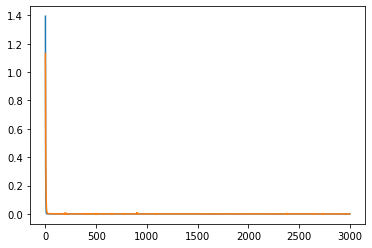

In [13]:
ax = plt.figure().add_subplot()
ax.plot(range(len(mean_squared_error)),mean_squared_error,label='train')
ax.plot(range(len(mean_squared_error)),val_mean_squared_error,label='val')

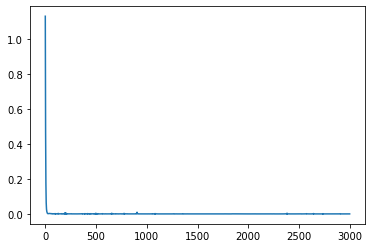

In [14]:
ax = plt.figure().add_subplot()
ax.plot(range(len(mean_squared_error)),val_mean_squared_error,label='val')

In [15]:
pre = model.predict(Xtest, batch_size=BATCH_SIZE)
print(pre)

[[0.8285064 ]
 [0.78705704]
 [0.81991905]
 [0.77961344]
 [0.8121351 ]
 [0.77006906]
 [0.80315495]
 [0.8417868 ]
 [0.8036727 ]
 [0.8379621 ]
 [0.7977109 ]
 [0.8308347 ]
 [0.7906517 ]
 [0.822527  ]
 [0.7833243 ]
 [0.8162939 ]
 [0.7752538 ]
 [0.80712056]
 [0.7672369 ]
 [0.8009662 ]
 [0.8389942 ]
 [0.8012946 ]
 [0.8353699 ]
 [0.7943581 ]
 [0.8285791 ]
 [0.7878496 ]
 [0.81956893]
 [0.779877  ]
 [0.81171685]
 [0.7717578 ]
 [0.81257755]
 [0.84210575]
 [0.8039835 ]
 [0.83743   ]
 [0.79859847]
 [0.8311059 ]
 [0.79162866]
 [0.8257311 ]
 [0.78405964]
 [0.8163716 ]
 [0.7764208 ]
 [0.807357  ]
 [0.7682238 ]
 [0.80093056]
 [0.838152  ]
 [0.8023516 ]
 [0.835565  ]
 [0.7953407 ]
 [0.82896376]
 [0.789004  ]
 [0.8218602 ]
 [0.780109  ]
 [0.812664  ]
 [0.77209014]
 [0.80828154]
 [0.8420698 ]
 [0.80388355]
 [0.8376506 ]
 [0.7998676 ]
 [0.8334796 ]
 [0.7918471 ]
 [0.82614964]
 [0.7850675 ]
 [0.8161115 ]
 [0.7768625 ]
 [0.80741763]
 [0.76869756]
 [0.8019859 ]
 [0.84184986]
 [0.8021987 ]
 [0.8353167 ]
 [0.79

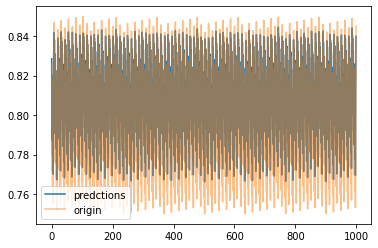

In [16]:
plt.figure()
plt.plot(pre[:,0],label='predctions',alpha=1)
plt.plot(Ytest[:,0],label='origin',alpha=0.5)
plt.legend(['predctions','origin'])


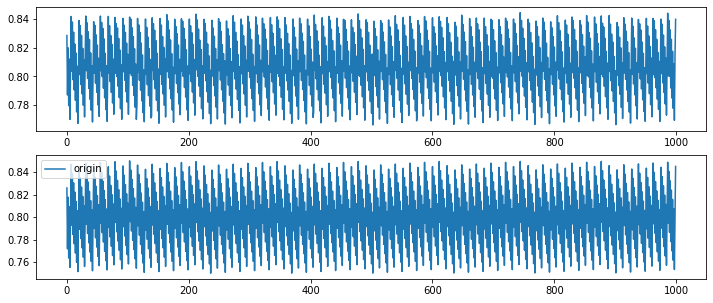

In [17]:
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.plot(pre,label='predctions')
plt.subplot(212)
plt.plot(Ytest,label='origin')
plt.legend()
plt.show()